In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.dates as mdates

In [19]:
Toulouse_amazon=pd.read_csv("Toulouse__amazon.csv")
# Toulouse_amazon[:3]

Dijon_amazon=pd.read_csv("Dijon_Amazon_Web_Services.csv")
# Dijon_amazon[:3]


In [20]:
def get_30_min(df):
    df_data = df.iloc[:, 2:]
    num_columns = len(df_data.columns)
    averages_df = pd.DataFrame()
    
    for i in range(0, num_columns, 2):
        combined_columns = df_data.iloc[:, i:i+2]
        combined_average = combined_columns.mean(axis=1)

        hour = i // 4
        minute = '00' if (i // 2) % 2 == 0 else '30'
        averages_df[f'{hour:02d}:{minute}'] = combined_average

    averages_df.insert(0, df.columns[1], df[df.columns[1]])
    averages_df.insert(0, df.columns[0], df[df.columns[0]])

    return averages_df

In [21]:
def extreme_outliers_handling(df):

    lower_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=5/ 100)
    
    upper_percentiles = df.select_dtypes(include=['int', 'float']).quantile(q=99/ 100)
    for column in lower_percentiles.index:
        lower_limit = lower_percentiles[column]
        upper_limit = upper_percentiles[column]
        df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
        df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

In [22]:
def boxplot_fun(df,title):
    plt.figure(figsize=(30, 10))
    df.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [23]:
Toulouse_amazon=get_30_min(Toulouse_amazon)
Dijon_amazon=get_30_min(Dijon_amazon)

In [24]:
Toulouse_amazon[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,109,12.5,1.5,1.5,12.5,0.5,0.0,1.5,0.0,...,89.5,807.0,41.5,398.0,69.5,56.0,30.5,677.5,1281.0,2045.5
1,20190316,455,20.5,3.0,1.5,19.0,1.5,0.5,3.0,0.0,...,85.0,614.0,50.0,306.5,93.5,79.0,45.0,499.0,946.0,1466.5
2,20190316,456,14.0,2.0,2.0,16.0,1.0,0.0,1.5,0.0,...,82.5,704.5,37.0,355.0,72.0,55.5,29.5,595.0,1133.5,1793.5


In [25]:
Dijon_amazon[:3]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,20190316,605,6.5,2.0,4.5,2.5,3.0,2.5,0.0,0.0,...,20.5,23.5,10.5,33.0,21.5,21.5,19.0,31.5,14.5,22.5
1,20190316,630,8.0,2.5,4.5,2.5,6.5,4.0,0.0,0.0,...,18.0,15.5,10.0,24.0,12.5,16.5,9.0,16.0,13.0,18.0
2,20190316,839,6.5,2.0,4.0,2.0,3.0,2.0,0.0,0.0,...,22.0,26.0,12.5,32.0,22.5,22.5,21.0,33.5,17.0,22.0


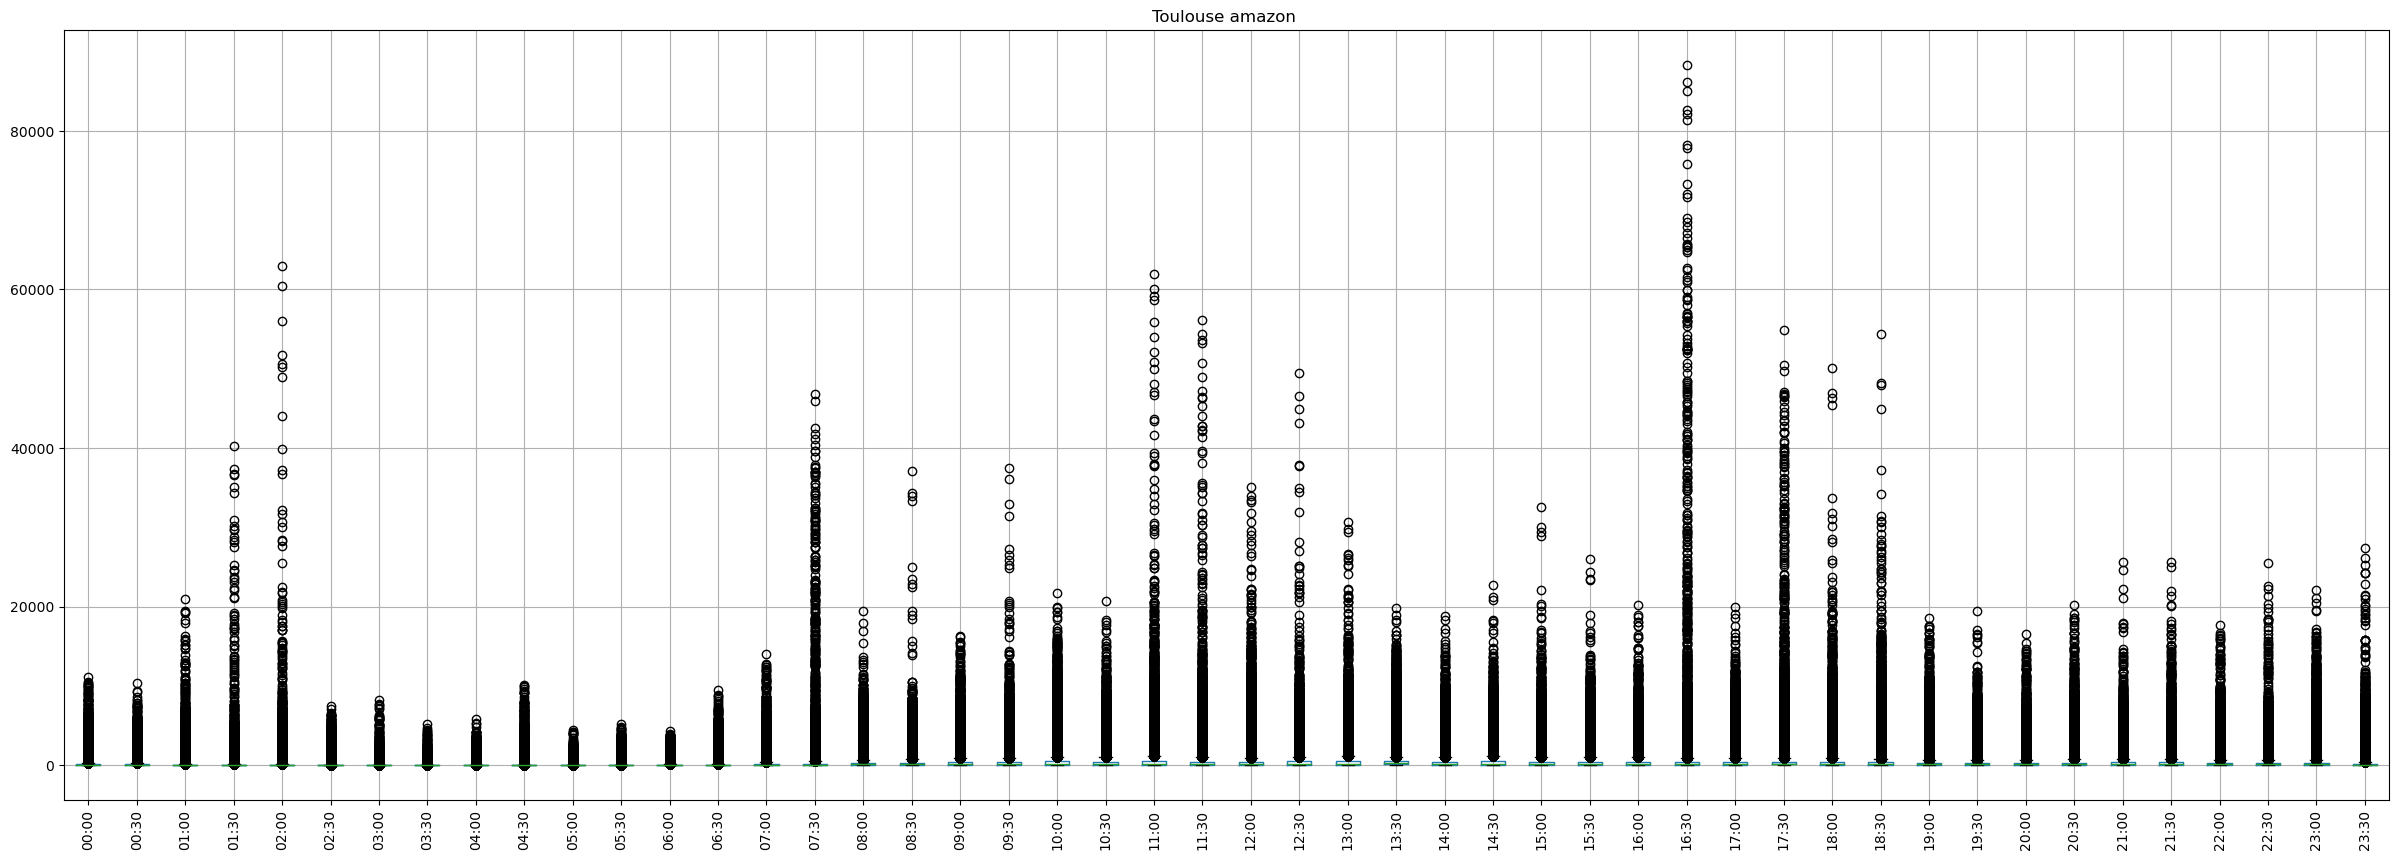

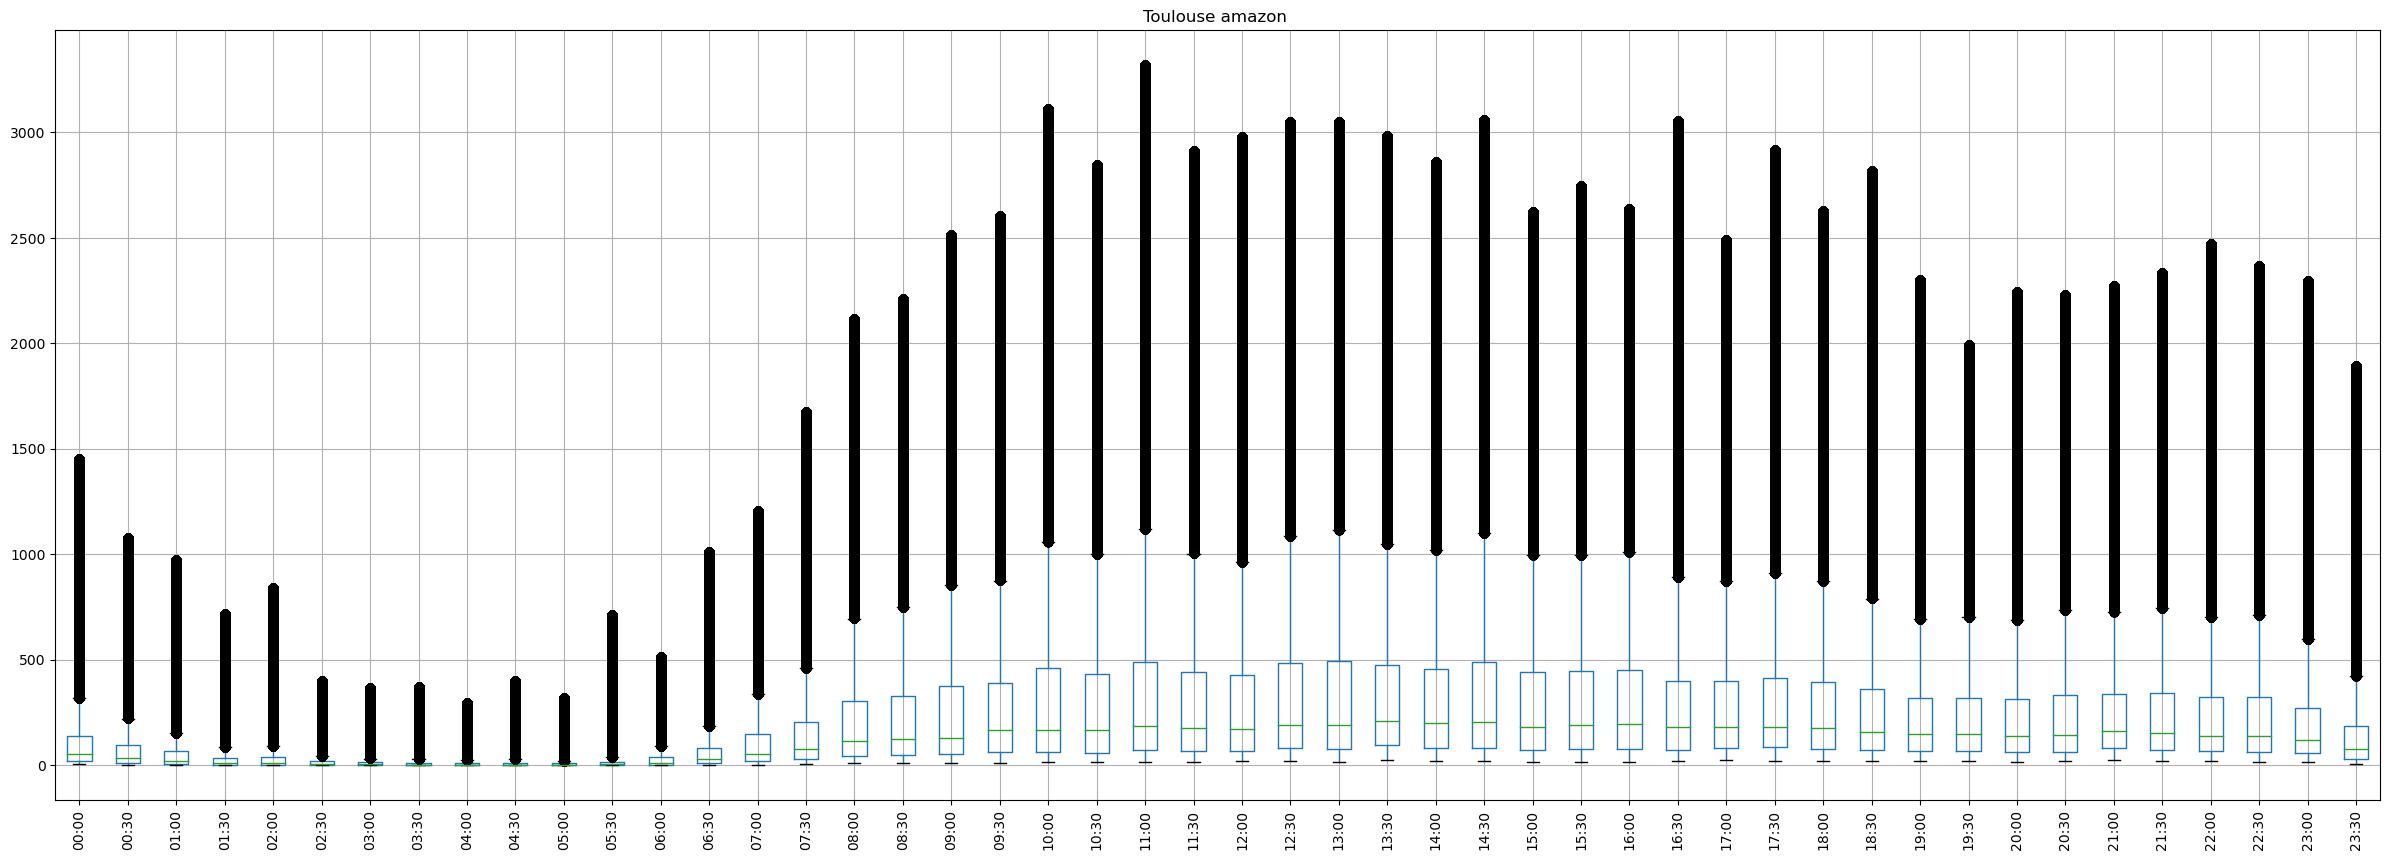

In [26]:
boxplot_fun(Toulouse_amazon.iloc[:,2:],"Toulouse amazon ")
Toulouse_amazon=extreme_outliers_handling(Toulouse_amazon)
boxplot_fun(Toulouse_amazon.iloc[:,2:],"Toulouse amazon ")

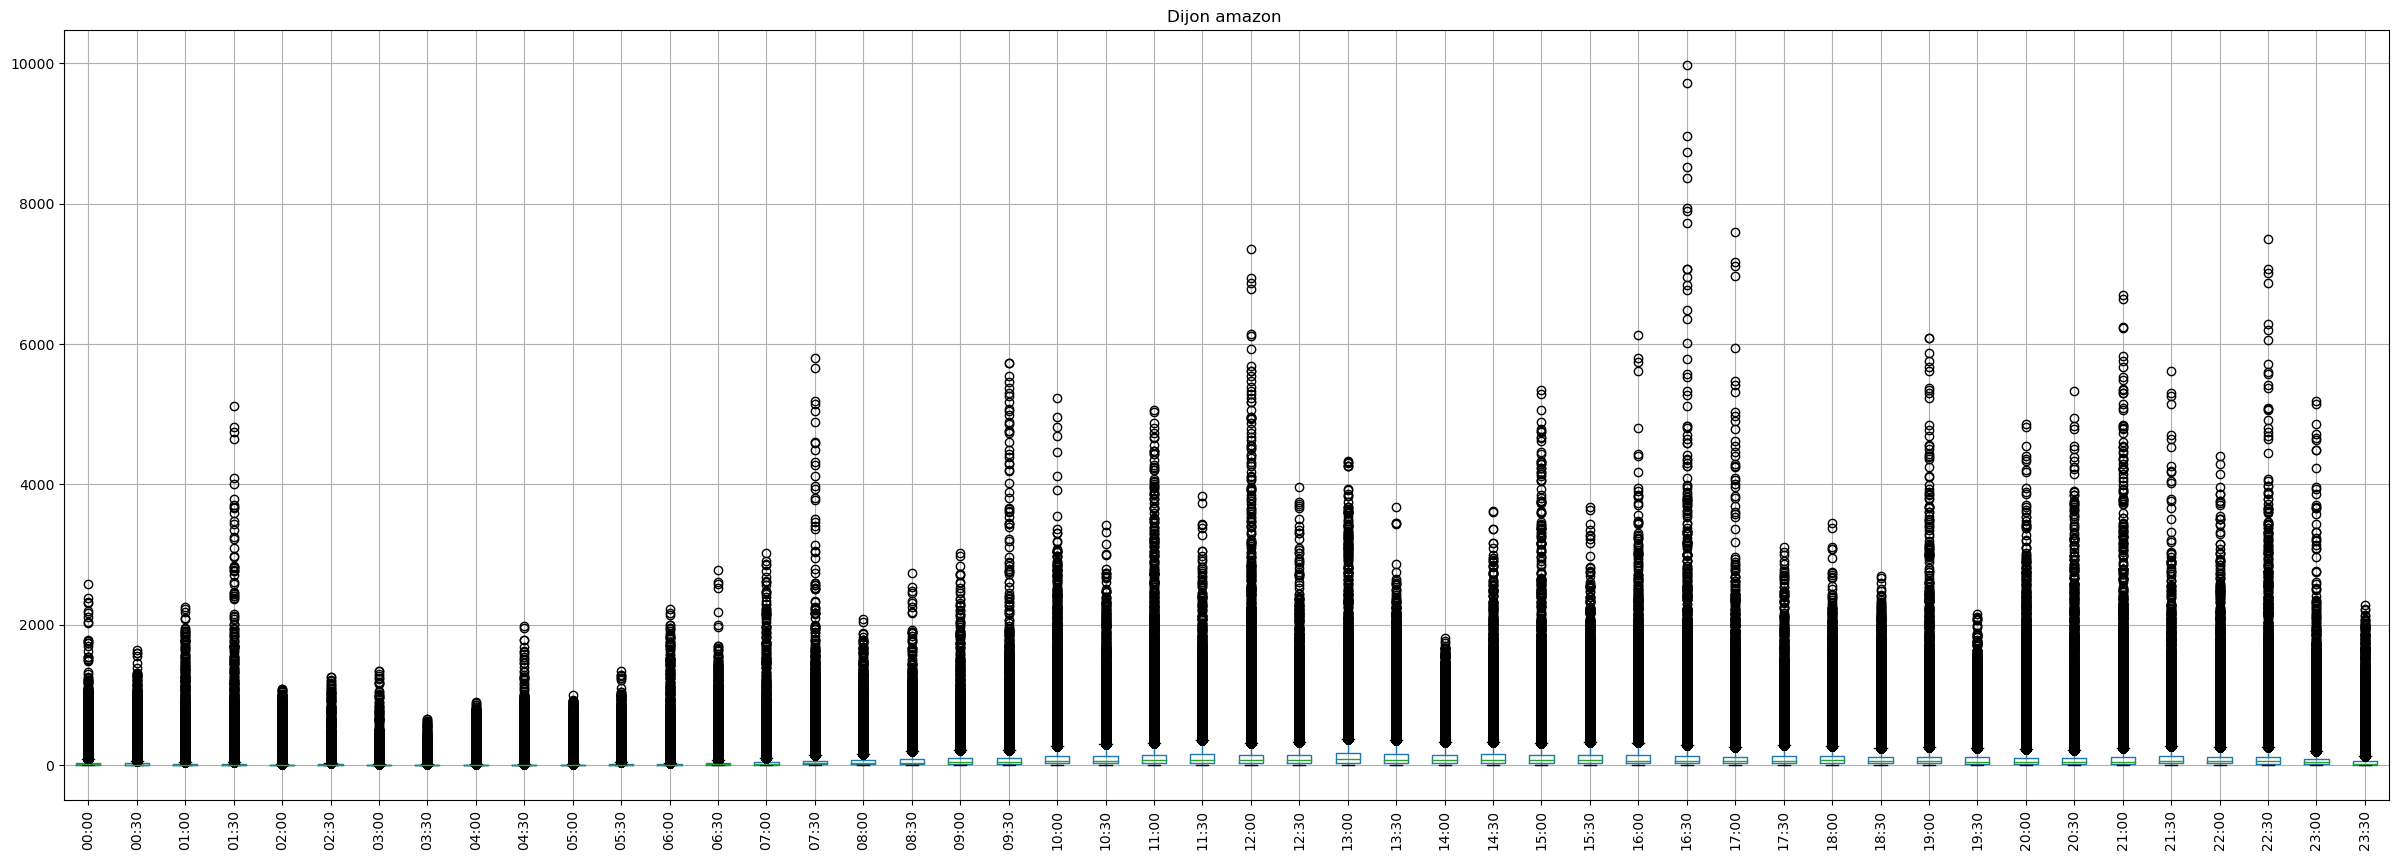

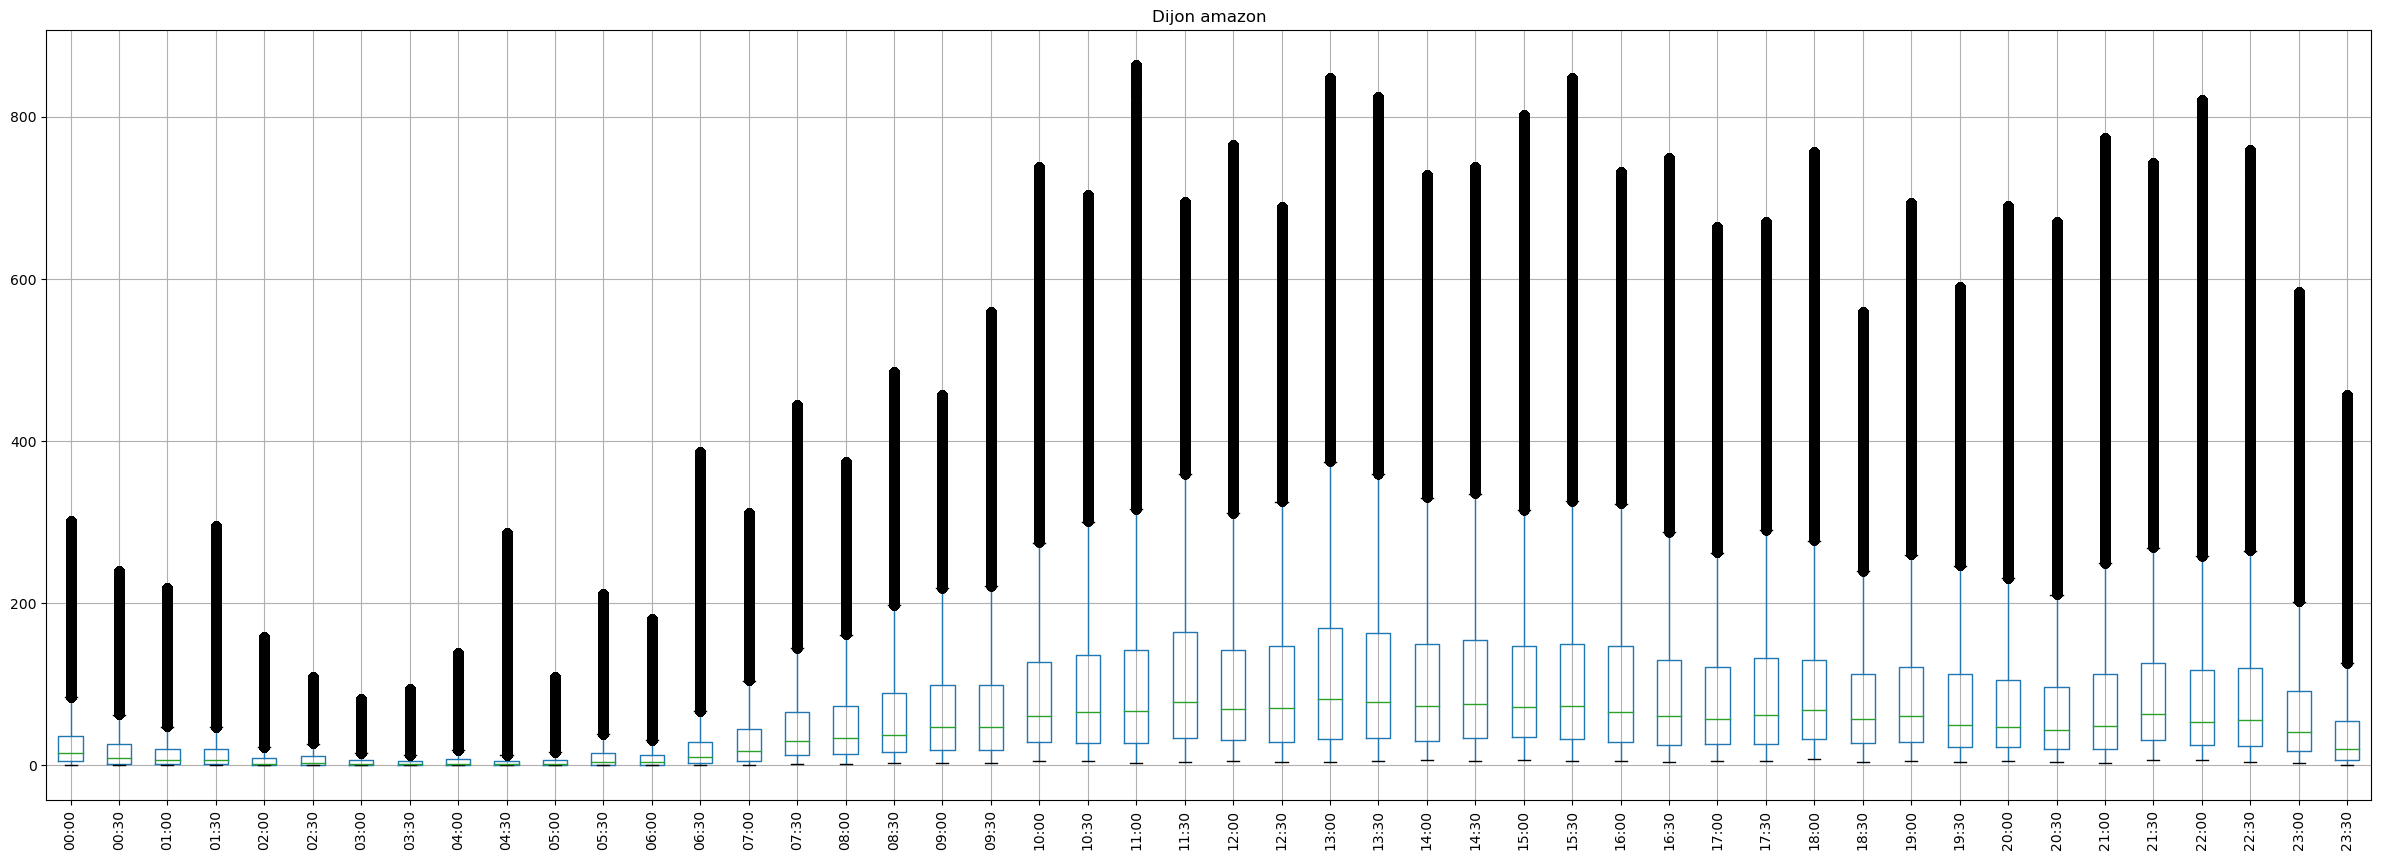

In [27]:
boxplot_fun(Dijon_amazon.iloc[:,2:],"Dijon amazon ")
Dijon_amazon=extreme_outliers_handling(Dijon_amazon)
boxplot_fun(Dijon_amazon.iloc[:,2:],"Dijon amazon")

In [28]:
Toulouse_amazon.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

In [29]:
Dijon_amazon.isna().sum()

Date       0
tile_id    0
00:00      0
00:30      0
01:00      0
01:30      0
02:00      0
02:30      0
03:00      0
03:30      0
04:00      0
04:30      0
05:00      0
05:30      0
06:00      0
06:30      0
07:00      0
07:30      0
08:00      0
08:30      0
09:00      0
09:30      0
10:00      0
10:30      0
11:00      0
11:30      0
12:00      0
12:30      0
13:00      0
13:30      0
14:00      0
14:30      0
15:00      0
15:30      0
16:00      0
16:30      0
17:00      0
17:30      0
18:00      0
18:30      0
19:00      0
19:30      0
20:00      0
20:30      0
21:00      0
21:30      0
22:00      0
22:30      0
23:00      0
23:30      0
dtype: int64

linear regression

In [30]:
Toulouse_amazon['Total usages'] = Toulouse_amazon.iloc[:,2:].sum(axis=1) 

Dijon_amazon['Total usages'] = Dijon_amazon.iloc[:,2:].sum(axis=1) 
Dijon_amazon[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,6217.0,6.5,2.0,4.5,2.5,3.0,2.5,0.0,0.0,...,23.5,10.5,33.0,21.5,21.5,19.0,31.5,14.5,22.5,771.5
1,20190316.0,6217.0,8.0,2.5,4.5,2.5,6.5,4.0,0.0,0.0,...,15.5,10.0,24.0,12.5,16.5,9.0,16.0,13.0,18.0,832.5


In [31]:
Toulouse_amazon[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,12.5,1.5,1.5,12.5,0.5,0.0,1.5,0.0,...,807.0,41.5,398.0,69.5,56.0,30.5,677.5,1281.0,1894.0,8935.5
1,20190316.0,12757.0,20.5,3.0,1.5,19.0,1.5,0.5,3.0,0.0,...,614.0,50.0,306.5,93.5,79.0,45.0,499.0,946.0,1466.5,7670.0


In [33]:
Toulouse_amazon['Total usages'] = Toulouse_amazon.iloc[:,2:].sum(axis=1) 

Dijon_amazon['Total usages'] = Dijon_amazon.iloc[:,2:].sum(axis=1) 
Toulouse_amazon[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,12.5,1.5,1.5,12.5,0.5,0.0,1.5,0.0,...,807.0,41.5,398.0,69.5,56.0,30.5,677.5,1281.0,1894.0,26806.5
1,20190316.0,12757.0,20.5,3.0,1.5,19.0,1.5,0.5,3.0,0.0,...,614.0,50.0,306.5,93.5,79.0,45.0,499.0,946.0,1466.5,23010.0


In [34]:
Toulouse_amazon[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,12.5,1.5,1.5,12.5,0.5,0.0,1.5,0.0,...,807.0,41.5,398.0,69.5,56.0,30.5,677.5,1281.0,1894.0,26806.5
1,20190316.0,12757.0,20.5,3.0,1.5,19.0,1.5,0.5,3.0,0.0,...,614.0,50.0,306.5,93.5,79.0,45.0,499.0,946.0,1466.5,23010.0


In [35]:
def randomforestregression(df):
    
    rf = RandomForestRegressor(n_estimators=100, random_state=2454)
    x = df.iloc[:, 0:2]
    y = df['Total usages']
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    rf.fit(xtrain, ytrain)
    pred = rf.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")

    plt.figure(figsize=(14, 7))
    plt.scatter(ytest, pred, alpha=0.6, color='purple')
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')
    plt.xlabel('Actual Total Usages')
    plt.ylabel('Predicted Total Usages')
    plt.title('Actual vs Predicted Total Usages')
    plt.grid(True)
    plt.show()

    errors = ytest - pred
    error_df = pd.DataFrame({'Date': xtest['Date'], 'Error': errors})
    pivot_table = error_df.pivot_table(index='Date', columns=None, values='Error', aggfunc='mean')

    plt.figure(figsize=(14, 7))
    sns.heatmap(pivot_table, cmap='magma', annot=True)
    plt.title('Heatmap of Prediction Errors')
    plt.show()

Mean Squared Error: 57627705.38153257
Mean Absolute Error: 4186.564973056169
R2 Score: 0.9487366755593255


C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


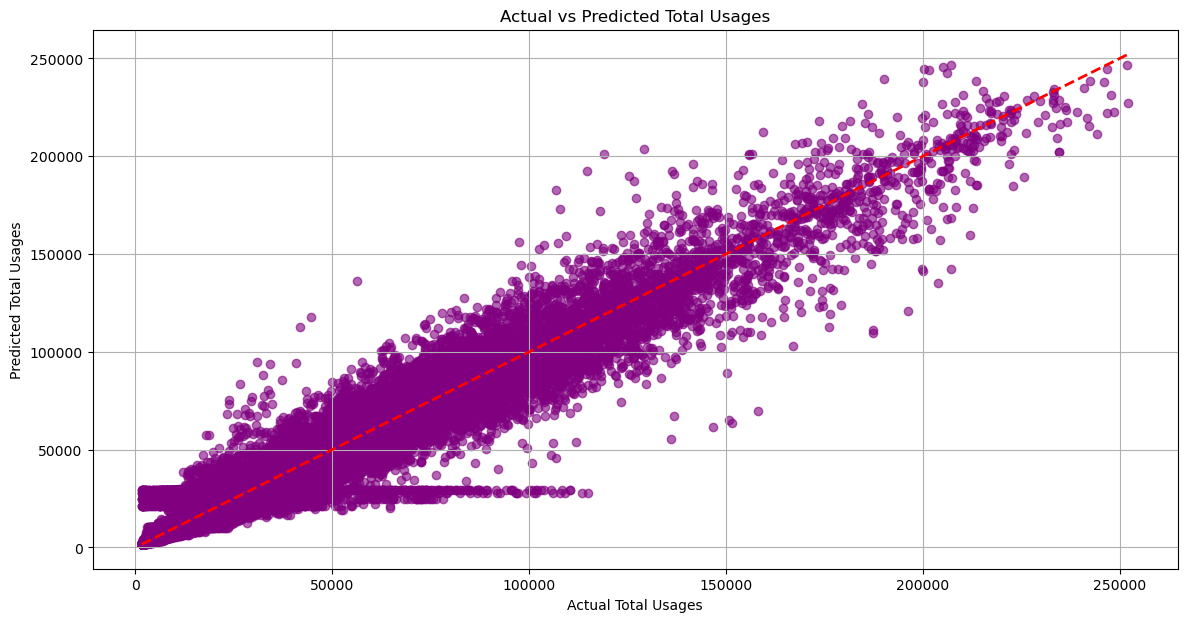

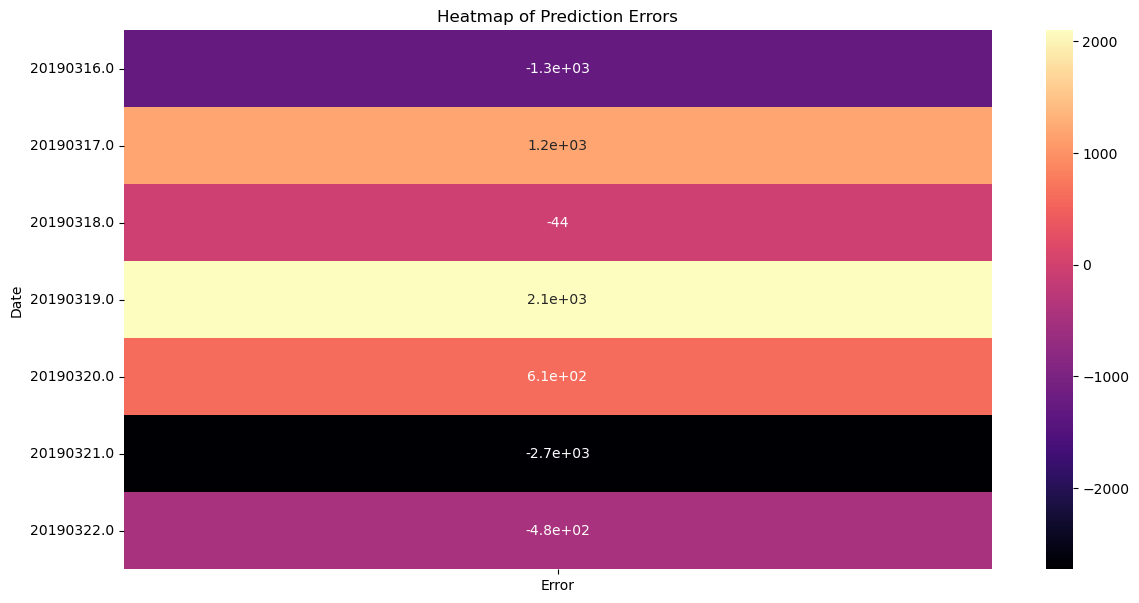

In [36]:
randomforestregression(Toulouse_amazon)

Mean Squared Error: 2768077.289476625
Mean Absolute Error: 1007.1668571333254
R2 Score: 0.9661055994817899


C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\210314665.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red')


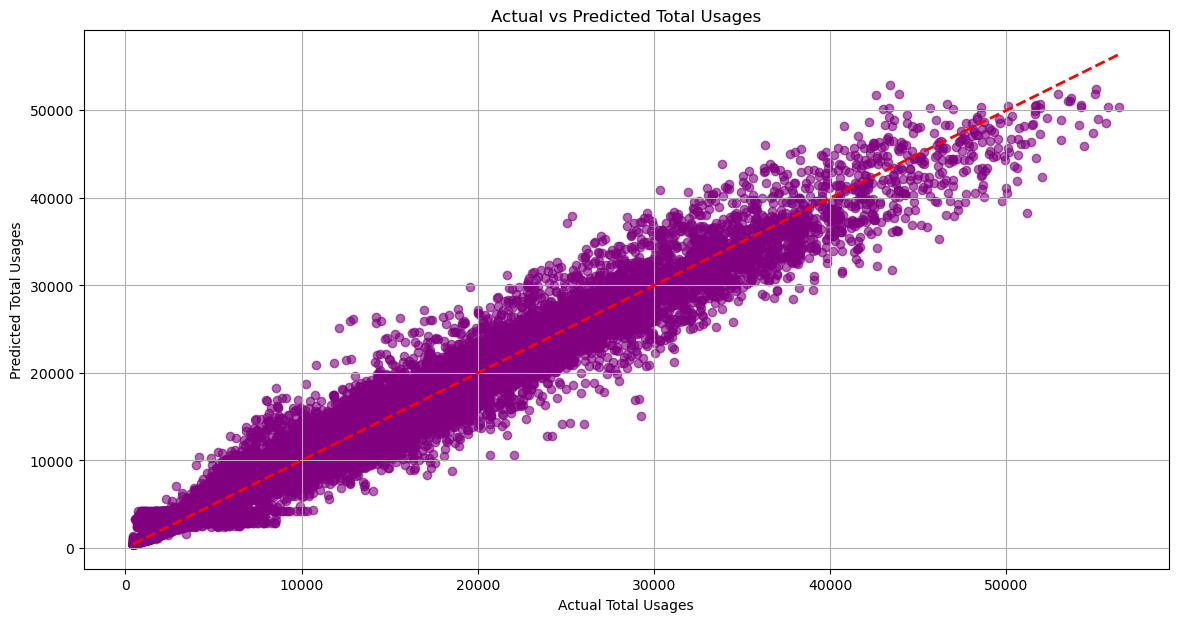

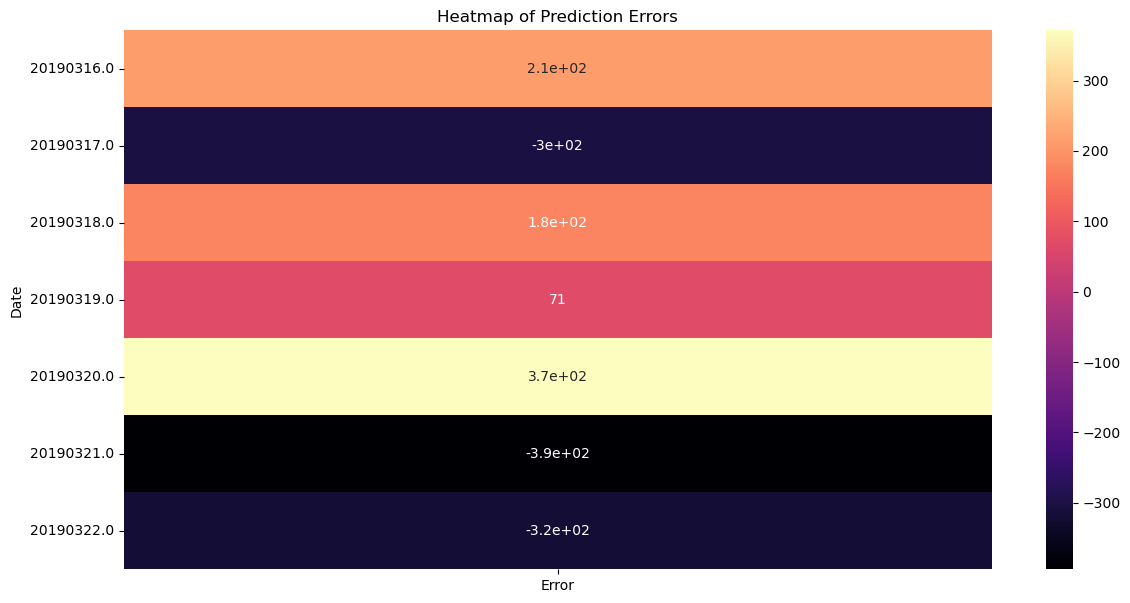

In [37]:
randomforestregression(Dijon_amazon)

In [38]:
Toulouse_amazon[:2]

,Date,tile_id,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total usages
0,20190316.0,12757.0,12.5,1.5,1.5,12.5,0.5,0.0,1.5,0.0,...,807.0,41.5,398.0,69.5,56.0,30.5,677.5,1281.0,1894.0,26806.5
1,20190316.0,12757.0,20.5,3.0,1.5,19.0,1.5,0.5,3.0,0.0,...,614.0,50.0,306.5,93.5,79.0,45.0,499.0,946.0,1466.5,23010.0


Clustering

In [39]:
def elbowmeathod(x,city):
    inertia = [] 
    mapping = {} 
    for k in range(1,10): 

        kmeanModel = KMeans(n_clusters=k).fit(x) 
        inertia.append(kmeanModel.inertia_) 
        mapping[k] = kmeanModel.inertia_ 
    plt.plot(range(1,10), inertia, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method of '+city) 
    plt.show() 



C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

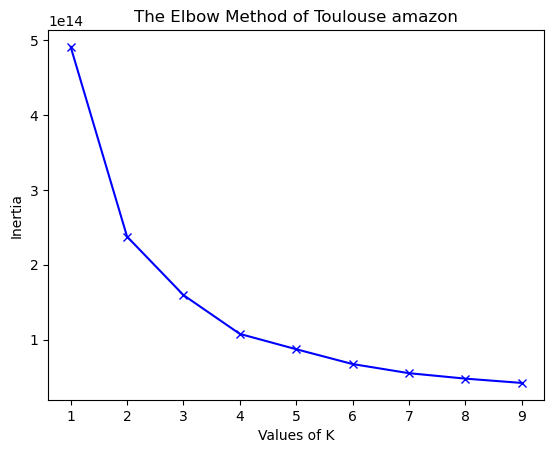

In [40]:
elbowmeathod(Toulouse_amazon,"Toulouse amazon")

C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

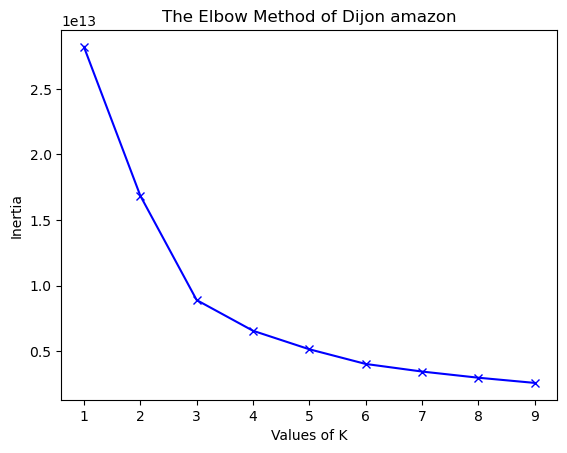

In [41]:
elbowmeathod(Dijon_amazon,"Dijon amazon")

In [42]:
def kmeans(n,df):
    kmeans = KMeans(n_clusters=n, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df)
    melted_df = df.melt(id_vars=['Date', 'tile_id', 'Cluster','Total usages'], var_name='Time', value_name='Usage')
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10')
    plt.title('Data Usage Clusters Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()
    plt.figure(figsize=(14, 8))
    sns.scatterplot(x='Time', y='Usage', hue='Cluster', data=melted_df, palette='tab10', s=50)
    plt.title('Cluster Visualization Over Time')
    plt.xlabel('Time')
    plt.ylabel('Usage')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()

C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


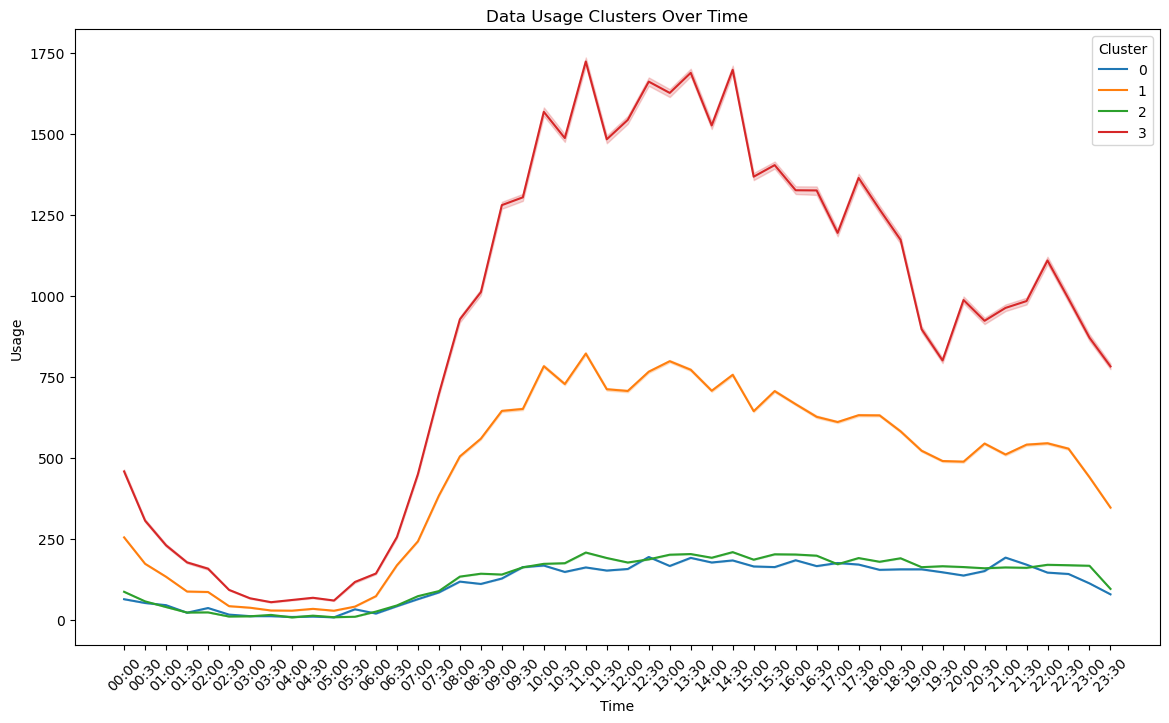

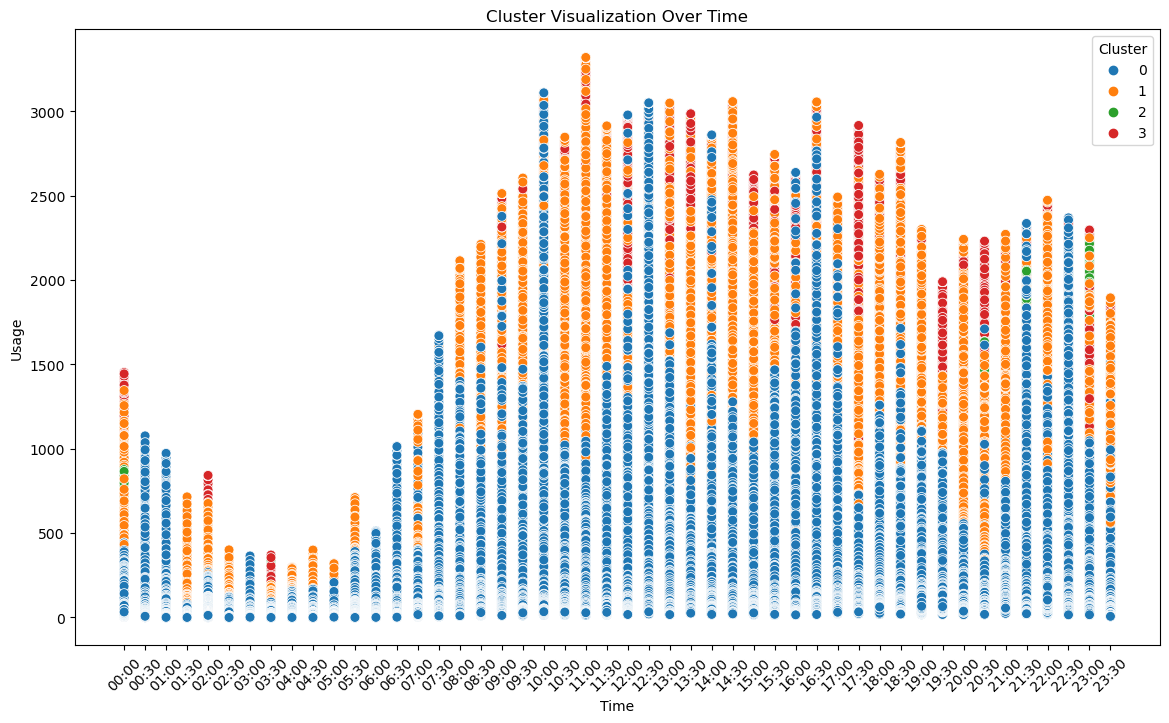

In [43]:
kmeans(4,Toulouse_amazon)

C:\Users\saifk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


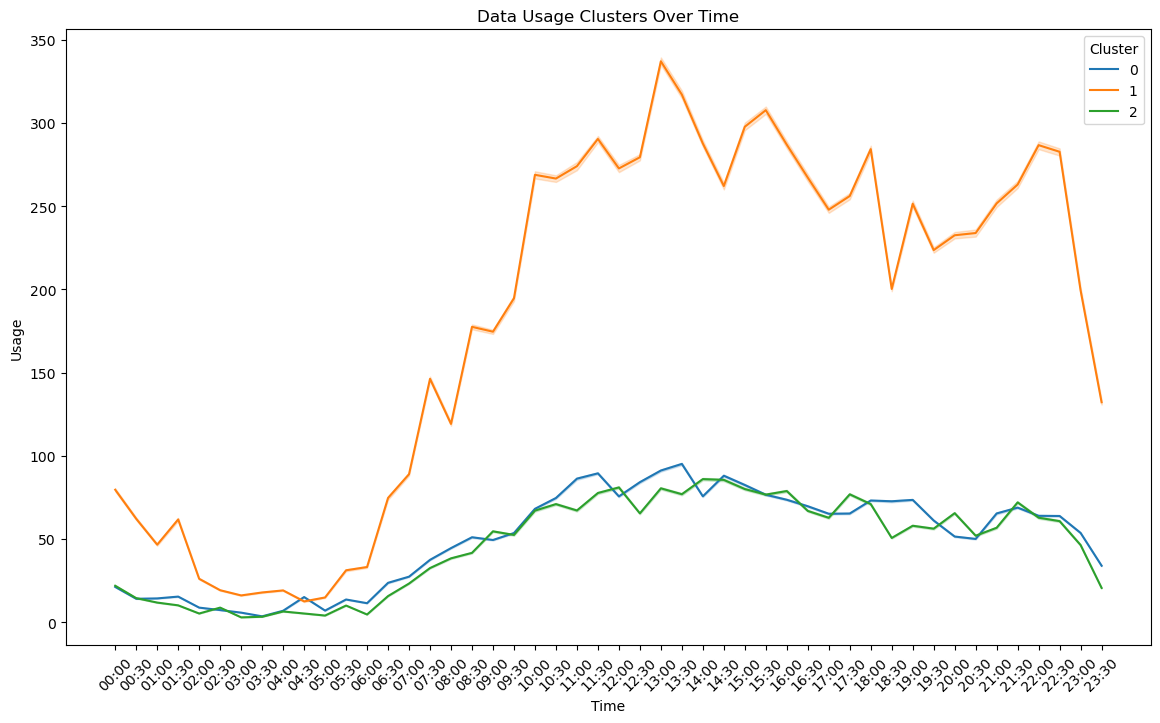

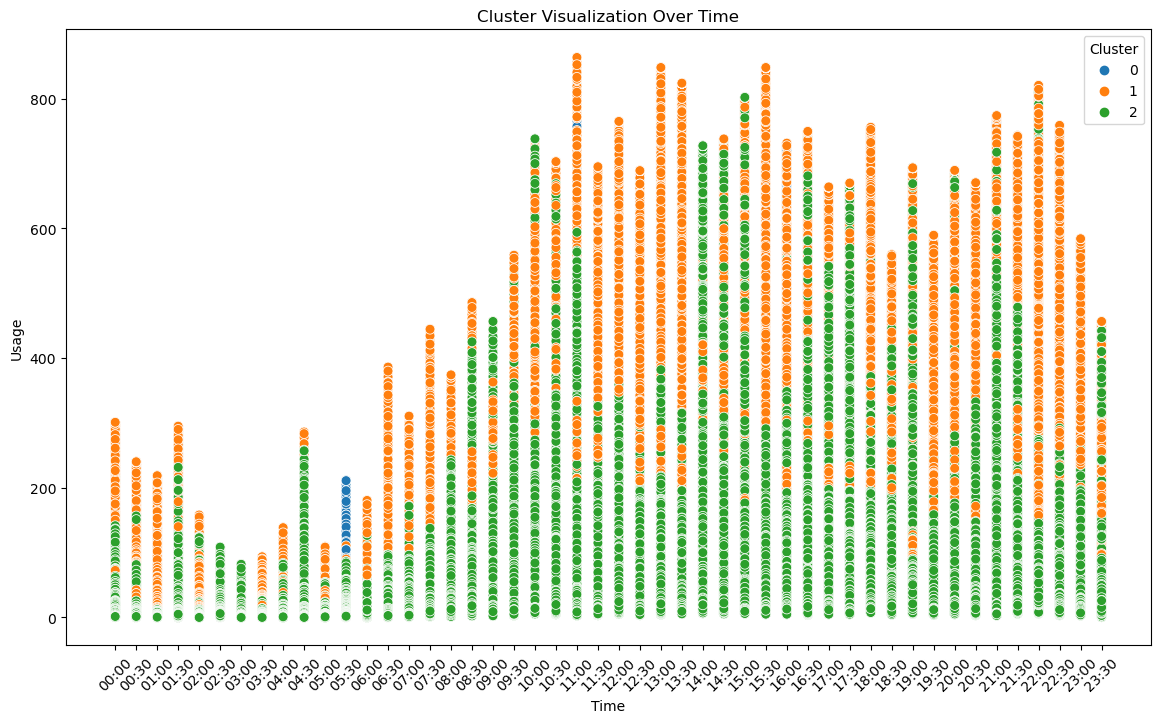

In [44]:
kmeans(3,Dijon_amazon)

In [45]:
Toulouse_amazon['Date'] = pd.to_datetime(Toulouse_amazon['Date'], format='%Y%m%d')
Dijon_amazon['Date'] = pd.to_datetime(Dijon_amazon['Date'], format='%Y%m%d')

In [46]:
df1=Toulouse_amazon[Toulouse_amazon['Cluster']==0]
df2=Toulouse_amazon[Toulouse_amazon['Cluster']==1]
df3=Toulouse_amazon[Toulouse_amazon['Cluster']==2]
df4=Toulouse_amazon[Toulouse_amazon['Cluster']==3]

In [47]:
df11=Dijon_amazon[Dijon_amazon['Cluster']==0]
df22=Dijon_amazon[Dijon_amazon['Cluster']==1]
df33=Dijon_amazon[Dijon_amazon['Cluster']==2]

C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1185724150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1185724150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1185724150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

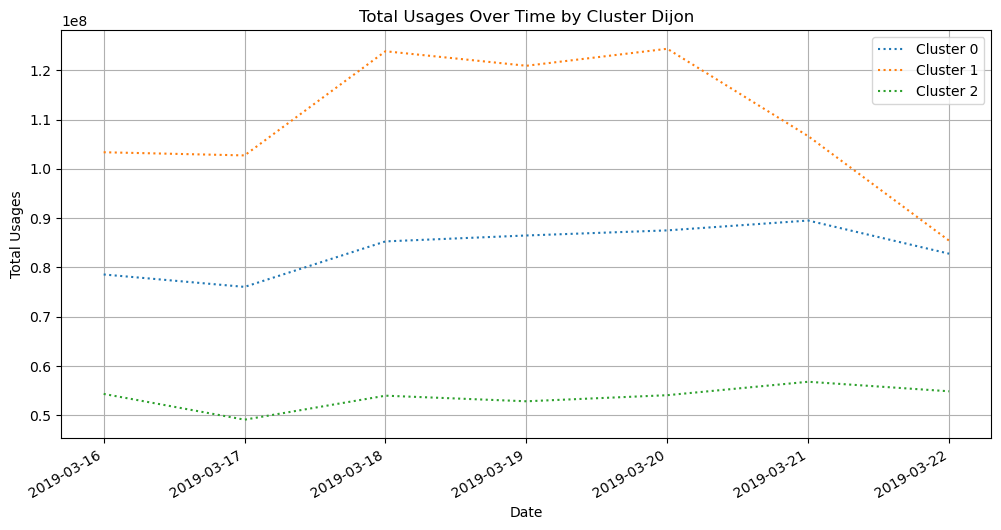

In [48]:
df11['Date'] = pd.to_datetime(df11['Date'], format='%Y%m%d')
df22['Date'] = pd.to_datetime(df22['Date'], format='%Y%m%d')
df33['Date'] = pd.to_datetime(df33['Date'], format='%Y%m%d')
df11 = df11.groupby('Date')['Total usages'].sum().reset_index()
df22 = df22.groupby('Date')['Total usages'].sum().reset_index()
df33 = df33.groupby('Date')['Total usages'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df11['Date'], df11['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df22['Date'], df22['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df33['Date'], df33['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Dijon')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate()  

plt.show()

C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1556534481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1556534481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
C:\Users\saifk\AppData\Local\Temp\ipykernel_17440\1556534481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

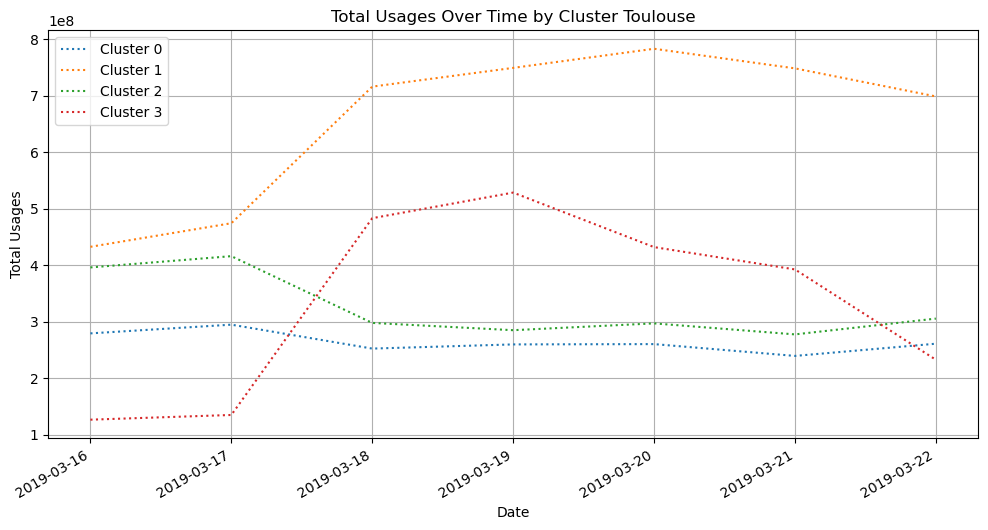

In [49]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y%m%d')
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y%m%d')
df3['Date'] = pd.to_datetime(df3['Date'], format='%Y%m%d')
df4['Date'] = pd.to_datetime(df4['Date'], format='%Y%m%d')
df1 = df1.groupby('Date')['Total usages'].sum().reset_index()
df2 = df2.groupby('Date')['Total usages'].sum().reset_index()
df3 = df3.groupby('Date')['Total usages'].sum().reset_index()
df4 = df4.groupby('Date')['Total usages'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['Total usages'], label='Cluster 0', color='tab:blue', linestyle='dotted')
plt.plot(df2['Date'], df2['Total usages'], label='Cluster 1', color='tab:orange', linestyle='dotted')
plt.plot(df3['Date'], df3['Total usages'], label='Cluster 2', color='tab:green', linestyle='dotted')
plt.plot(df4['Date'], df4['Total usages'], label='Cluster 3', color='tab:red', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Total Usages')
plt.title('Total Usages Over Time by Cluster Toulouse')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gcf().autofmt_xdate() 

plt.show()

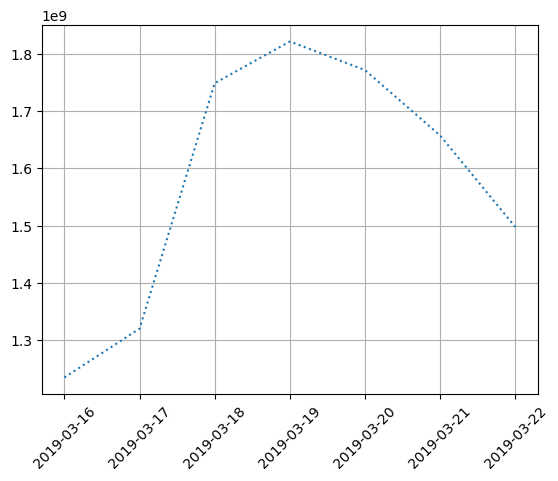

In [50]:
def datetimeplot(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    daily_usages = df.groupby('Date')['Total usages'].sum().reset_index()
    plt.plot(daily_usages['Date'],daily_usages['Total usages'], linestyle = 'dotted')
    plt.xticks(rotation=45)
    plt.grid(True)
datetimeplot(Toulouse_amazon)

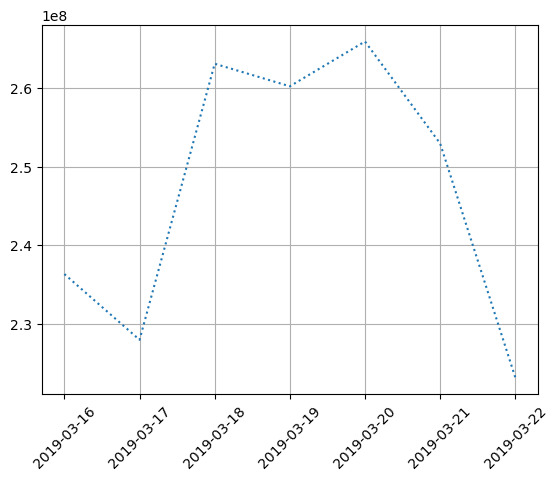

In [51]:
datetimeplot(Dijon_amazon)

In [58]:
def KNN(df):
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    df['Total usages'] =df.iloc[:,2:].sum(axis=1) 
    lr = KNeighborsRegressor()
    x = df.iloc[:, 2:12]
    y = df.iloc[:, 12:-1]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2454)
    

    lr.fit(xtrain, ytrain)
    pred = lr.predict(xtest)
    mse = mean_squared_error(ytest, pred)
    mae = mean_absolute_error(ytest, pred)
    r2 = r2_score(ytest, pred)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R2 Score: {r2}")
    y_test_flat = np.array(ytest).flatten()
    pred_flat = np.array(pred).flatten()
    results_df = pd.DataFrame({ 'Actual': y_test_flat, 'Predicted': pred_flat})

    plt.figure(figsize=(18, 6))
    sns.lineplot(x='Actual', y='Predicted', data=results_df)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Values with Regression Line')
    plt.show()

Mean Squared Error: 266867.9837030691
Mean Absolute Error: 58.43971054371643
R2 Score: 0.8639132565205989


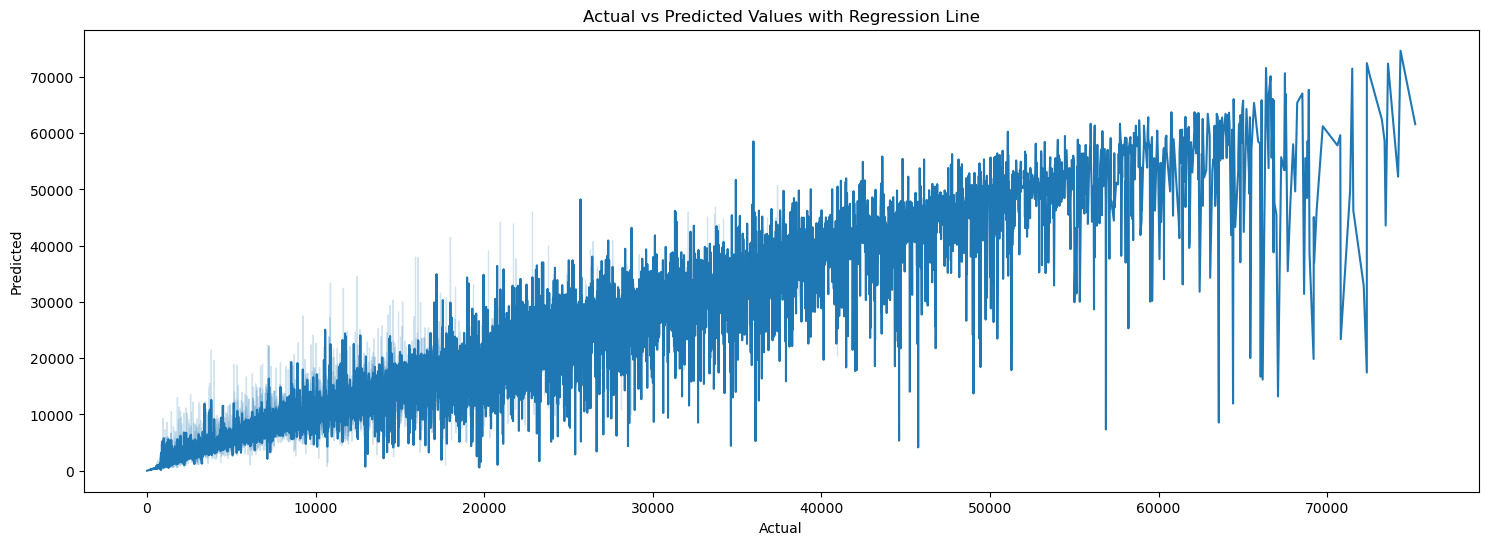

In [59]:
KNN(Dijon_amazon)

Mean Squared Error: 6271278.768591123
Mean Absolute Error: 251.4345359990465
R2 Score: 0.7860208454995655


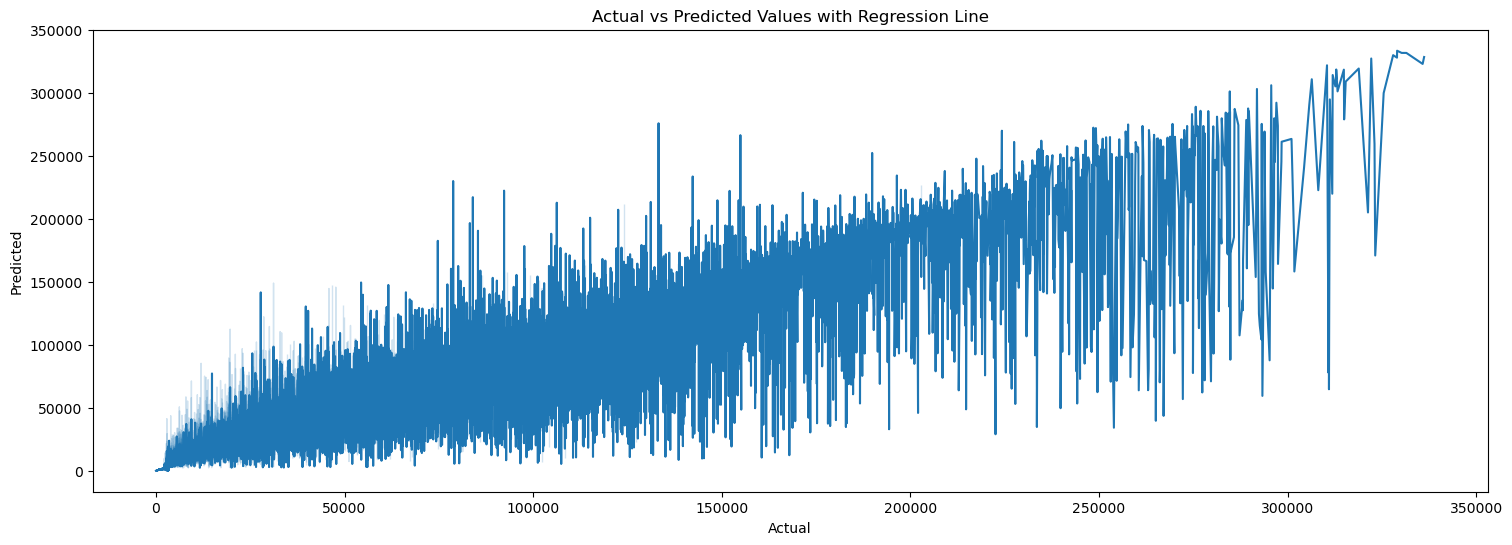

In [60]:
KNN(Toulouse_amazon)